# Loading packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Dataset generation

In [2]:
X = np.zeros((150, 2))

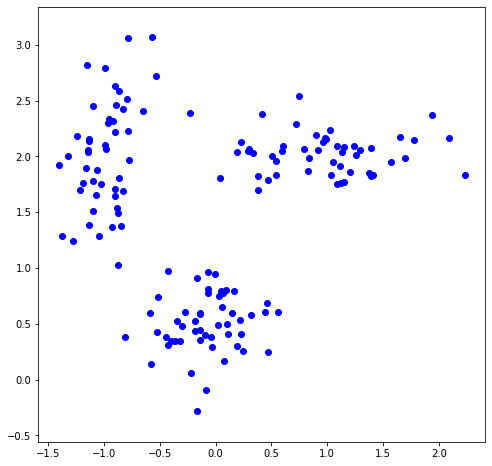

In [3]:
np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.5, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=1.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=2.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

plt.figure(figsize=(8, 8))
plt.plot(X[:, 0], X[:, 1], "bo")
plt.axis("equal")
plt.show()

# Algorithm implementation

## Parameters initialization

In [4]:
k = 3  # number of clusters
n_iter = 7  # number of iterations
metric = "euclidean" 

## Implementation

### Initialize $k$ points as `centroids` randomly

In [5]:
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1.0, size=6)
centroids = centroids.reshape((3, 2))
centroids

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

### Create a list for storing history of `centroids`

In [6]:
centroids_history = []
centroids_history.append(centroids)
centroids_history

[array([[ 0.49671415, -0.1382643 ],
        [ 0.64768854,  1.52302986],
        [-0.23415337, -0.23413696]])]

### Finding best `centroids`

In [7]:
for _ in range(n_iter):
    # calculate the distance between every point and every centroid
    dist = cdist(X, centroids, metric=metric)

    # find the closest centroid to every point
    close_centroid = np.argmin(dist, axis=1)

    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[close_centroid == 0, :], axis=0)
    centroids[1, :] = np.mean(X[close_centroid == 1, :], axis=0)
    centroids[2, :] = np.mean(X[close_centroid == 2, :], axis=0)

    centroids_history.append(centroids)

### Plotting the iterations

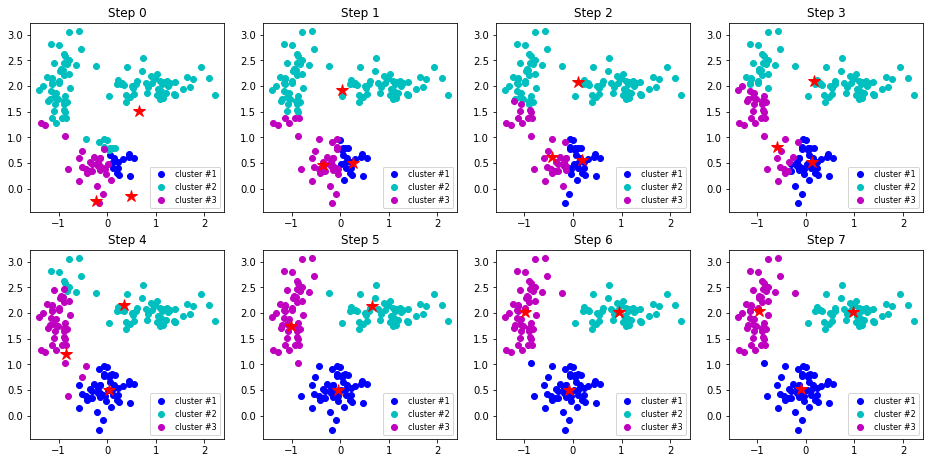

In [8]:
plt.figure(figsize=(16, 16))
for i in range(n_iter + 1):
    distances = cdist(X, centroids_history[i])
    labels = distances.argmin(axis=1)

    num_row = num_col = (n_iter // 2) + 1

    plt.subplot(num_row, num_col, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "co", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "mo", label="cluster #3")
    plt.plot(
        centroids_history[i][:, 0], centroids_history[i][:, 1], "r*", markersize=12
    )
    plt.legend(loc=0, prop={"size": 8})
    plt.title("Step {:}".format(i))